# ECO462: Homework 1

In [31]:
# Relevant basic Python libraries

import pandas as pd   # Excel sheet manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Histograms and bar charts
import seaborn as sns  # Visualizations
from scipy.stats import skew, kurtosis, norm  # Statistical functions

## Section A: Average Returns

In [148]:
# Question 1 Coding Portion
df_returns = pd.read_excel("../data/STOCKS.xlsx")

df_returns.columns = df_returns.iloc[0]
df_returns = df_returns[1:]
df_returns.reset_index(drop=True, inplace=True)
df_returns["DATE"] = pd.to_datetime(df_returns["DATE"])

df_returns = df_returns.set_index("DATE")

df_stats = pd.DataFrame()
df_stats["Average"] = df_returns.mean()
df_stats["Standard Deviation"] = df_returns.std()
df_stats.sort_values(by="Standard Deviation", ascending=False, inplace=True)

print(df_stats)

          Average Standard Deviation
0                                   
IBM      0.009251           0.068725
BMY      0.012091           0.068297
KMB      0.007625           0.060736
AEP      0.008651            0.05452
XOM      0.010165           0.052893
S&P500D  0.009267           0.042654
S&P500   0.006815           0.042597
TBILL    0.003556           0.002539


**INCOMPLETE: REVIST PROBLEM**
### Question 1 Written Portion

The riskier stocks seem to have a weak relationship with superior returns, where the lowest standard deviation has the lowest return and the highest standard deviation has among the highest returns, though not the highest. Thus, the relationship is not perfect but there seems to be a broad trend.

**IBM** has the highest standard deviation, and has an average return of **0.00925** while the **TBILL** has the lowest standard deviation with a return of **0.00356**.

In [69]:
# Question 2 Coding Portion

def split_series(series):
  midpoint = len(series) // 2
  return [series.iloc[:midpoint], series.iloc[midpoint:]]

split_list = split_series(df_returns["S&P500D"])

df_stats_SP500D = pd.DataFrame()
df_stats_SP500D["First Half"] = [split_list[0].mean()]
df_stats_SP500D["Second Half"] = [split_list[1].mean()]

print(df_stats_SP500D)

   First Half  Second Half
0    0.008739     0.009795


**INCOMPLETE: REVISIT PROBLEM**

### Question 2 Written Portion

The means are not stable over time, as evident by the standard deviations of each stock, such that mean is not a representative prediction for the next period's value, since any given future prediction has a large interval of uncertainty. With such a high level of uncertainty, the prediction loses much of its predictive power.

Using the framework of subperiods, suppose there are ten subperiods and you intend to predict the next subperiod's price. If each subperiod has wildly different values, the mean is a poor predictor of the single next subperiod, and thus you often cannot reliably use mean as a proxed for future _expected_ returns.

A potential solution to this is perhaps predicting a certain future subperiod using data that is more consistent, ex. with lower variability.

In [78]:
# Question 3 Coding Portion

df_min_max = pd.DataFrame()
df_min_max["Minimum"] = df_returns.min()
df_min_max["Maximum"] = df_returns.max()

print(df_min_max)

          Minimum   Maximum
0                          
S&P500D -0.215349  0.167767
S&P500   -0.21763  0.163047
TBILL    0.000008  0.012663
AEP     -0.177661  0.286957
KMB     -0.217647  0.322379
BMY     -0.281798  0.430769
XOM     -0.261858  0.233125
IBM     -0.261905  0.353799


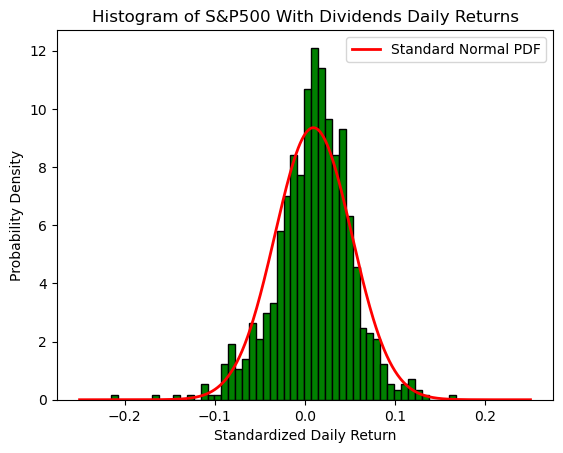

6.970748601783647e-08


In [122]:
# Question 4 Coding Portion

plt.hist(df_returns["S&P500D"], bins=50, density=True, color='green', edgecolor='black')

x = np.linspace(-.25, .25, 500)
standard_normal_pdf = norm.pdf(x, loc=df_returns["S&P500D"].mean(), scale=df_returns["S&P500D"].std())
plt.plot(x, standard_normal_pdf, color='red', linewidth=2, label='Standard Normal PDF')
plt.xlabel("Standardized Daily Return")
plt.ylabel("Probability Density")
plt.title("Histogram of S&P500 With Dividends Daily Returns")
plt.legend()
plt.show()

# Finding the minimum 
print(norm.cdf(df_min_max.loc["S&P500D","Minimum"], loc=df_returns["S&P500D"].mean(), scale=df_returns["S&P500D"].std()))

**INCOMPLETE: REVISIT PROBLEM**

### Question 4 Written Portion

Based on the minimum value found for S&P500D in question 3, and taking the CDF of the value to get the probability that the value is equal to or less than. Additionally, recall that a continuous distribution cannot have a specific value such that the minimum value will not truly be incapsulated in the inequality.

## Section B: Correlation of Returns

In [102]:
# Question 1 Coding Portion
correlation_matrix = df_returns[['AEP', 'KMB', 'BMY', 'XOM', 'IBM']].corr()
print(correlation_matrix)

print(df_returns.columns)

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix of Monthly Returns")
# plt.show()

0         AEP       KMB       BMY       XOM       IBM
0                                                    
AEP  1.000000  0.350149  0.285216  0.306274  0.141823
KMB  0.350149  1.000000  0.385672  0.266460  0.254916
BMY  0.285216  0.385672  1.000000  0.289176  0.322943
XOM  0.306274  0.266460  0.289176  1.000000  0.332985
IBM  0.141823  0.254916  0.322943  0.332985  1.000000
Index(['S&P500D', 'S&P500', 'TBILL', 'AEP', 'KMB', 'BMY', 'XOM', 'IBM'], dtype='object', name=0)


**INCOMPLETE: REVIST PROBLEM**

### Question 1 Written Portion

All of the stocks are barely moderatedly correlated, with the highest pairwise correlation between BMY and KMB, which may be due to 

## Section C: Skewness and Kurtosis

In [ ]:
# Question 1 Coding Portion
print(f"Skew: {skew(pd.to_numeric(df_returns["S&P500D"], errors='raise'))}")
print(f"Kurtosis: {kurtosis(pd.to_numeric(df_returns["S&P500D"], errors="raise"))}")

Skew: -0.4271027211080216
Kurtosis: 1.785343943613812


**INCOMPLETE: REVIST PROBLEM**

### Question 1 Written Portion

Based on the skew and kurtosis calculations, while the distribtuions of S&P500D returns are roughly Gaussian normal, there is still divergence as seen in the negative skew and smaller kurtosis (compared to a normal distribution skew of 0 and kurtosis of 3). These inferences are supported by the observations of the histogram, where there were multiple values in areas of the distribution where there should not have been any values.

## Section 4: Investments in Different Assets

In [151]:
# Question 1 Coding Portion

df_returns_factors = 1 + df_returns.copy()
df_portfolio = df_returns_factors.cumprod()
print("------------- Final Portfolio Values of Stocks -------------")
print(df_portfolio.iloc[-1])

------------- Final Portfolio Values of Stocks -------------
0
S&P500D    487.097712
S&P500      79.582234
TBILL       13.989444
AEP        204.722468
KMB         75.158728
BMY        1390.05508
XOM        669.046059
IBM        167.586469
Name: 2021-12-01 00:00:00, dtype: object


In [152]:
# Question 2 Coding Portion

print("\n------------- Proportion of Dividend-Based Returns -------------")
proportion_of_dividends = (1-(df_portfolio["S&P500"].iloc[-1]/df_portfolio["S&P500D"].iloc[-1]))
percentage_of_dividends = (1-(df_portfolio["S&P500"].iloc[-1]/df_portfolio["S&P500D"].iloc[-1])) * 100
print(f"The proportion of returns attributable to dividends is: {proportion_of_dividends:.4f}\nThe percentage is: {percentage_of_dividends:.2f}%")


------------- Proportion of Dividend-Based Returns -------------
The proportion of returns attributable to dividends is: 0.8366
The percentage is: 83.66%



------------- 1-Year Rolling Window -------------
     S&P500D     TBILL
0   0.071087  0.030711
1   0.223093  0.025833
2  -0.040436  0.030193
3    0.26312  0.034567
4   0.205071  0.038698
..       ...       ...
56  0.200401  0.003383
57  0.264094  0.010056
58 -0.023149  0.020188
59  0.216837  0.019894
60  0.172494  0.002443

[61 rows x 2 columns]

------------- 10-Year Rolling Window -------------
     S&P500D     TBILL
0    0.06935  0.040413
1   0.085847  0.043627
2   0.072292  0.045536
3   0.097235  0.047019
4   0.058785  0.051073
..       ...       ...
56  0.106441  0.005604
57  0.086414  0.005264
58   0.06125  0.004259
59  0.063738  0.002254
60  0.043065  0.000281

[61 rows x 2 columns]

------------- Bar Charts -------------


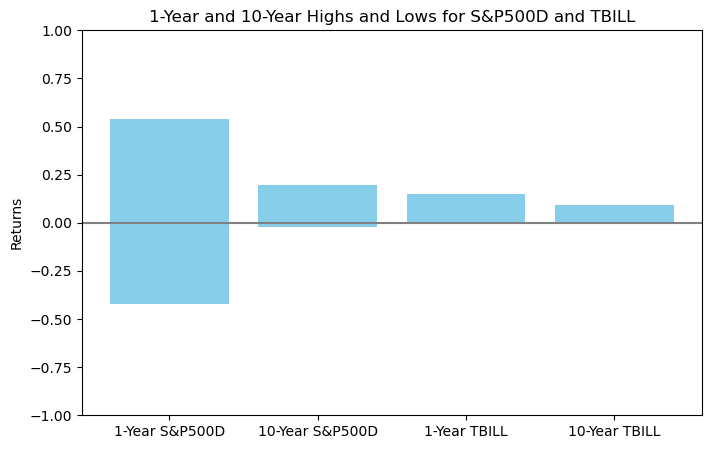

S&P500D 10-Year Minimum Return: -0.022470187812138054
TBILL 10-Year Minimum Return: 0.0002814875798065053
   S&P500D 10-Year Average  S&P500D 10-Year Standard Deviation  \
0                 0.101145                            0.051832   

   TBILL 10-Year Average  TBILL 10-Year Standard Deviation  
0               0.042467                          0.028968  


In [174]:
# Question 3 Coding Portion

# TASK: Increase modularity at some point, by replacing the assets with a parameter array
def rolling_window_returns(df_returns: pd.DataFrame, interval: int=1):
    df_pair_returns = pd.DataFrame(columns=["S&P500D","TBILL"])
    
    start_date = df_returns.index[0]
    end_date = df_returns.index[-1]
    n_years = (end_date - start_date).days // 365

    for i in range(n_years):
        interval_start = start_date + pd.DateOffset(years=i)
        interval_end = start_date + pd.DateOffset(years=i + interval)

        interval_data = df_returns.loc[interval_start:interval_end]

        cumulative_return_SP500 = (1 + interval_data["S&P500D"]).prod() - 1
        cumulative_return_TBILL = (1 + interval_data["TBILL"]).prod() - 1

        annualized_cumulative_return_SP500 = (1+cumulative_return_SP500)**(1/interval)-1
        annualized_cumulative_return_TBILL = (1+cumulative_return_TBILL)**(1/interval)-1

        df_pair_returns.loc[i, "S&P500D"] = annualized_cumulative_return_SP500
        df_pair_returns.loc[i, "TBILL"] = annualized_cumulative_return_TBILL
    return df_pair_returns

print("\n------------- 1-Year Rolling Window -------------")
annual_rolling = rolling_window_returns(df_returns)
print(annual_rolling)

print("\n------------- 10-Year Rolling Window -------------")
ten_rolling = rolling_window_returns(df_returns, 10)
print(rolling_window_returns(df_returns, 10))

print("\n------------- Bar Charts -------------")

labels = ['1-Year S&P500D','10-Year S&P500D', '1-Year TBILL', '10-Year TBILL']
lows = [annual_rolling["S&P500D"].min(), ten_rolling["S&P500D"].min(), annual_rolling["TBILL"].min(), ten_rolling["TBILL"].min()]
highs = [annual_rolling["S&P500D"].max(), ten_rolling["S&P500D"].max(), annual_rolling["TBILL"].max(), ten_rolling["TBILL"].max()]

heights = [high - low for low, high in zip(lows, highs)]

plt.figure(figsize=(8, 5))
plt.bar(labels, heights, bottom=lows, color='skyblue') 

plt.axhline(0, color='gray', linestyle='-')

plt.ylim(-1,1)
plt.title("1-Year and 10-Year Highs and Lows for S&P500D and TBILL")
plt.ylabel("Returns")
plt.show()

print(f"S&P500D 10-Year Minimum Return: {lows[1]}\nTBILL 10-Year Minimum Return: {lows[3]}")

df_stats_rolling = pd.DataFrame([{
    "S&P500D 10-Year Average": ten_rolling["S&P500D"].mean(),
    "S&P500D 10-Year Standard Deviation": ten_rolling["S&P500D"].std(),
    "TBILL 10-Year Average": ten_rolling["TBILL"].mean(),
    "TBILL 10-Year Standard Deviation": ten_rolling["TBILL"].std()
}])

print(df_stats_rolling)

### Question 3 Written Portion

The worst possible return on the S&P500D over 10 years is -2.247% (-0.02247) while the TBILL's over the same time period is 0.028% (0.00028) which is a stark difference. The average of S&P500D is over double that of the TBILL, however the standard deviation is also nearly double. This perfectly encapsulates the mean-variance trade off and the risk premia, where returns will tend to be higher but the downside also tends to be higher.

### <u>*Statement of Collaboration (including ChatGPT)*</u>

I collaborated with **Rosalia Mwidege** and **Theodore Ouyang**. Additionally, **ChatGPT** was used to debug any error-prone code and find the proper Excel-equivalent Python functions and libraries to properly execute the solutions to the problems, in conjunction with the hints listed on the problem set.

### <u>*Honor Code*</u>
This assignment: represents my own work in accordance with University regulations and class policy.